# Projeto 1: Análise de Vendas de uma Loja de Varejo

## Objetivo:

Realizar a manipulação e limpeza dos dados de vendas e criar visualizações para entender o desempenho da loja.

### 1. Obtenção dos Dados:

- Baixe um dataset de vendas de varejo. Você pode usar o dataset de Vendas de Varejo do Kaggle.

### 2. Exploração Inicial dos Dados:

- Carregue os dados usando Pandas.
- Exiba as primeiras linhas e verifique a estrutura do DataFrame.
- Obtenha informações básicas: tipos de dados, valores ausentes, estatísticas descritivas.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_vendas_varejo = pd.read_csv("dataset_vendas.csv")

In [3]:
df_vendas_varejo.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
df_vendas_varejo.shape

(9700, 11)

In [5]:
df_vendas_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [6]:
df_vendas_varejo.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [7]:
df_vendas_varejo.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


### 3. Limpeza dos Dados:

- Identifique e trate dados ausentes.
- Corrija tipos de dados incorretos.
- Remova duplicatas.
- Trate valores anômalos.

In [8]:
df_vendas_varejo.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
df_vendas_varejo["Data_Pedido"] = pd.to_datetime(df_vendas_varejo["Data_Pedido"])

C:\Users\ruben\AppData\Local\Temp\ipykernel_17856\536740102.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_vendas_varejo["Data_Pedido"] = pd.to_datetime(df_vendas_varejo["Data_Pedido"])


In [10]:
df_vendas_varejo = df_vendas_varejo.drop_duplicates()

In [11]:
df_vendas_varejo.shape

(9700, 11)

<Axes: xlabel='Valor_Venda'>

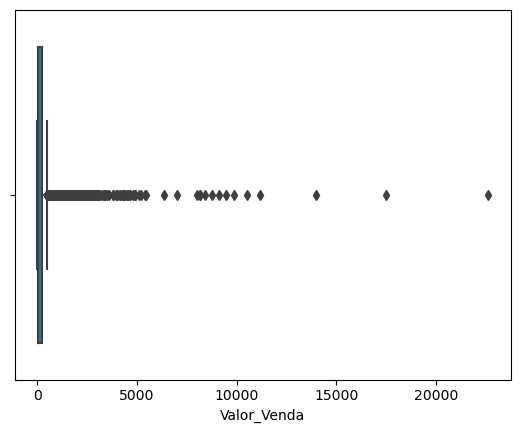

In [12]:
sns.boxplot(x=df_vendas_varejo["Valor_Venda"])

In [13]:
Q1 = df_vendas_varejo["Valor_Venda"].quantile(0.25)
Q3 = df_vendas_varejo["Valor_Venda"].quantile(0.5)

In [15]:
IQR = Q3 - Q1
IQR

37.024

In [16]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

limite_superior

109.80799999999999

In [17]:
outliers = df_vendas_varejo[(df_vendas_varejo['Valor_Venda'] < limite_inferior) | (df_vendas_varejo['Valor_Venda'] > limite_superior)]["Valor_Venda"]
outliers.count()

3496

### 4. Manipulação dos Dados:

- Crie colunas adicionais: ano, mês, dia a partir da data de venda.
- Calcule métricas de vendas: total de vendas por dia, mês, ano.
- Agrupe dados por categoria de produto, região, etc.

### 5. Visualização dos Dados:

- Crie gráficos de linha para mostrar as vendas ao longo do tempo.
- Use gráficos de barras para comparar vendas por categoria de produto.
- Crie um gráfico de pizza para mostrar a participação das vendas por região.

In [20]:
df_vendas_varejo.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [24]:
colunas_selecionadas = ["Data_Pedido", "Valor_Venda"]

In [25]:
datas_vendas = df_vendas_varejo.filter(items=colunas_selecionadas) 

In [26]:
datas_vendas.head()

,Data_Pedido,Valor_Venda
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [29]:
datas_vendas["Dia"] = datas_vendas["Data_Pedido"].dt.day
datas_vendas["Mes"] = datas_vendas["Data_Pedido"].dt.month
datas_vendas["Ano"] = datas_vendas["Data_Pedido"].dt.year

In [31]:
datas_vendas.head()

,Data_Pedido,Valor_Venda,Dia,Mes,Ano
0,2017-08-11,261.9600,11,8,2017
1,2017-08-11,731.9400,11,8,2017
2,2017-12-06,14.6200,6,12,2017
3,2016-11-10,957.5775,10,11,2016
4,2016-11-10,22.3680,10,11,2016


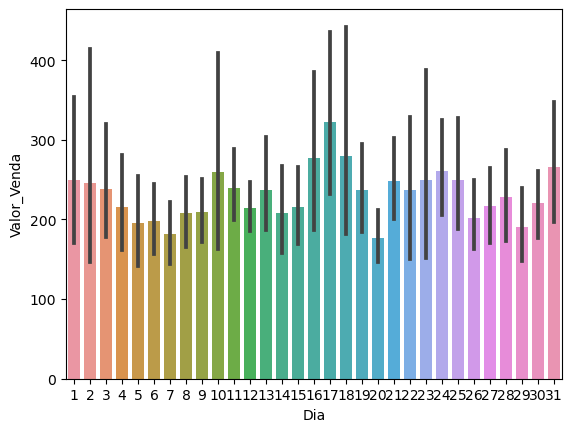

In [33]:
sns.barplot(x="Dia", y="Valor_Venda", data=datas_vendas);

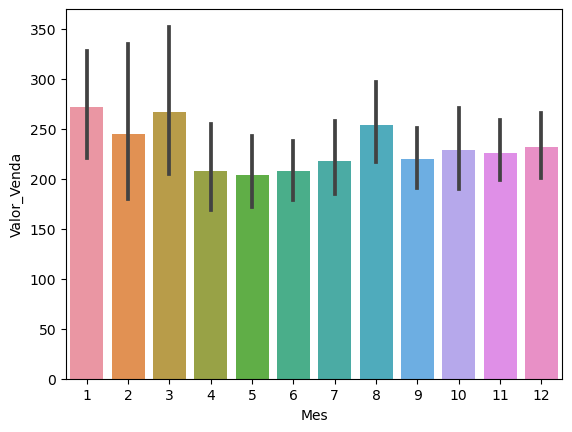

In [34]:
sns.barplot(x="Mes", y="Valor_Venda", data=datas_vendas);

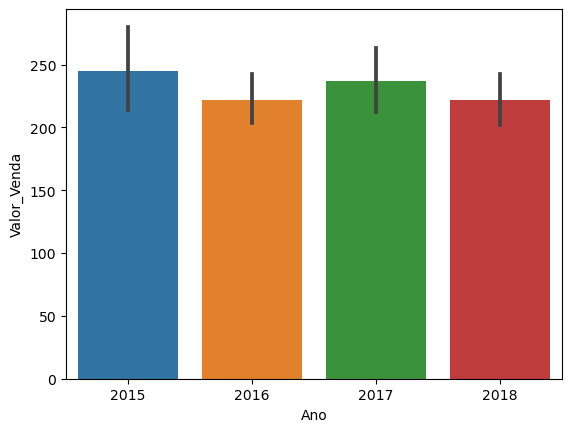

In [35]:
sns.barplot(x="Ano", y="Valor_Venda", data=datas_vendas);

In [36]:
df_vendas_varejo.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [39]:
agr_categoria_vendas = df_vendas_varejo.groupby("Categoria").agg({"Valor_Venda": "sum"}).reset_index()
agr_categoria_vendas.head()

,Categoria,Valor_Venda
0,Furniture,716910.8017
1,Office Supplies,695097.7720
2,Technology,823549.3810


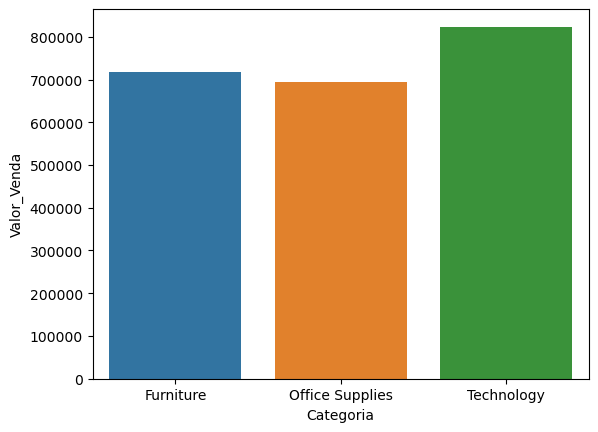

In [42]:
sns.barplot(x="Categoria", y="Valor_Venda", data=agr_categoria_vendas);

In [44]:
agr_subcategoria_vendas = df_vendas_varejo.groupby("SubCategoria").agg({"Valor_Venda": "sum"}).reset_index()
agr_subcategoria_vendas.head()

,SubCategoria,Valor_Venda
0,Accessories,162791.3620
1,Appliances,104061.6930
2,Art,26573.7360
3,Binders,194723.3810
4,Bookcases,108045.0467


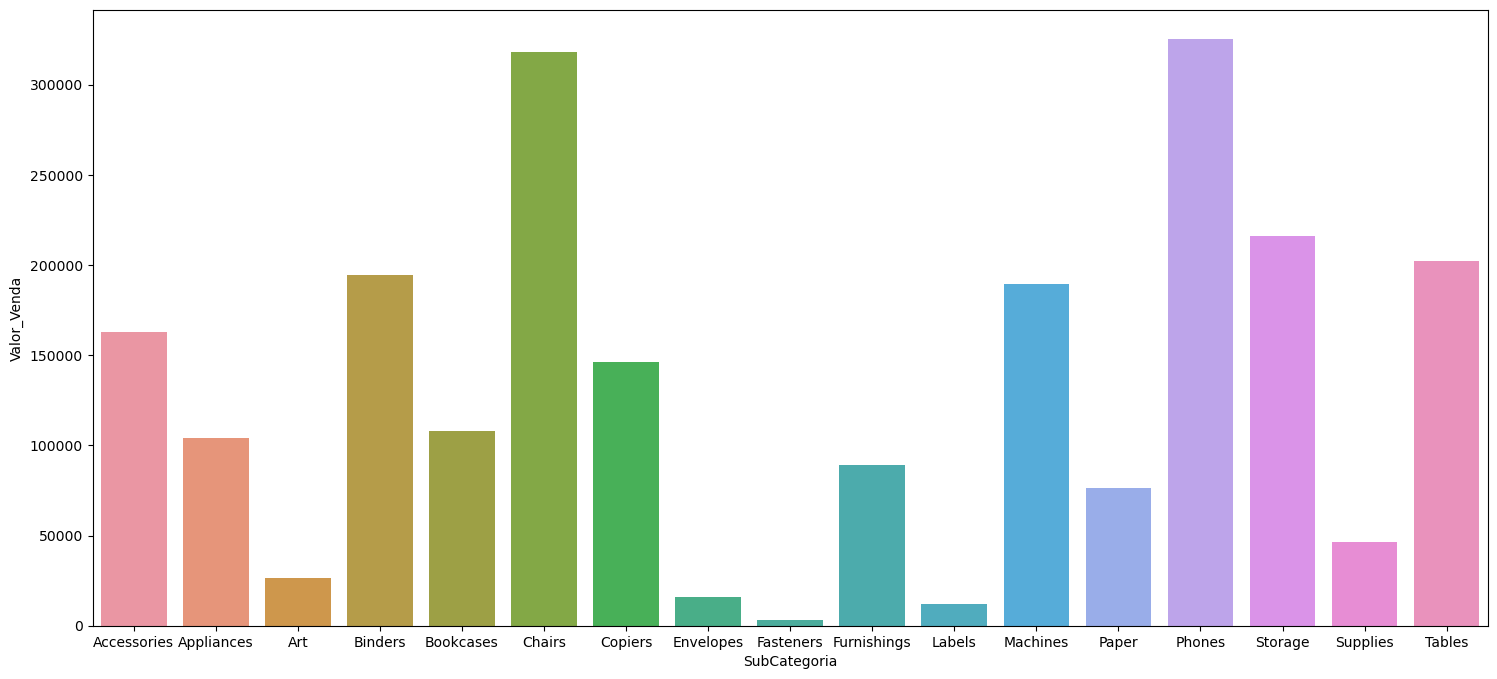

In [50]:
plt.figure(figsize=(18, 8))
sns.barplot(x="SubCategoria", y="Valor_Venda", data=agr_categoria_vendas);

In [52]:
agr_segmento_vendas = df_vendas_varejo.groupby("Segmento").agg({"Valor_Venda": "sum"}).reset_index()
agr_segmento_vendas.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


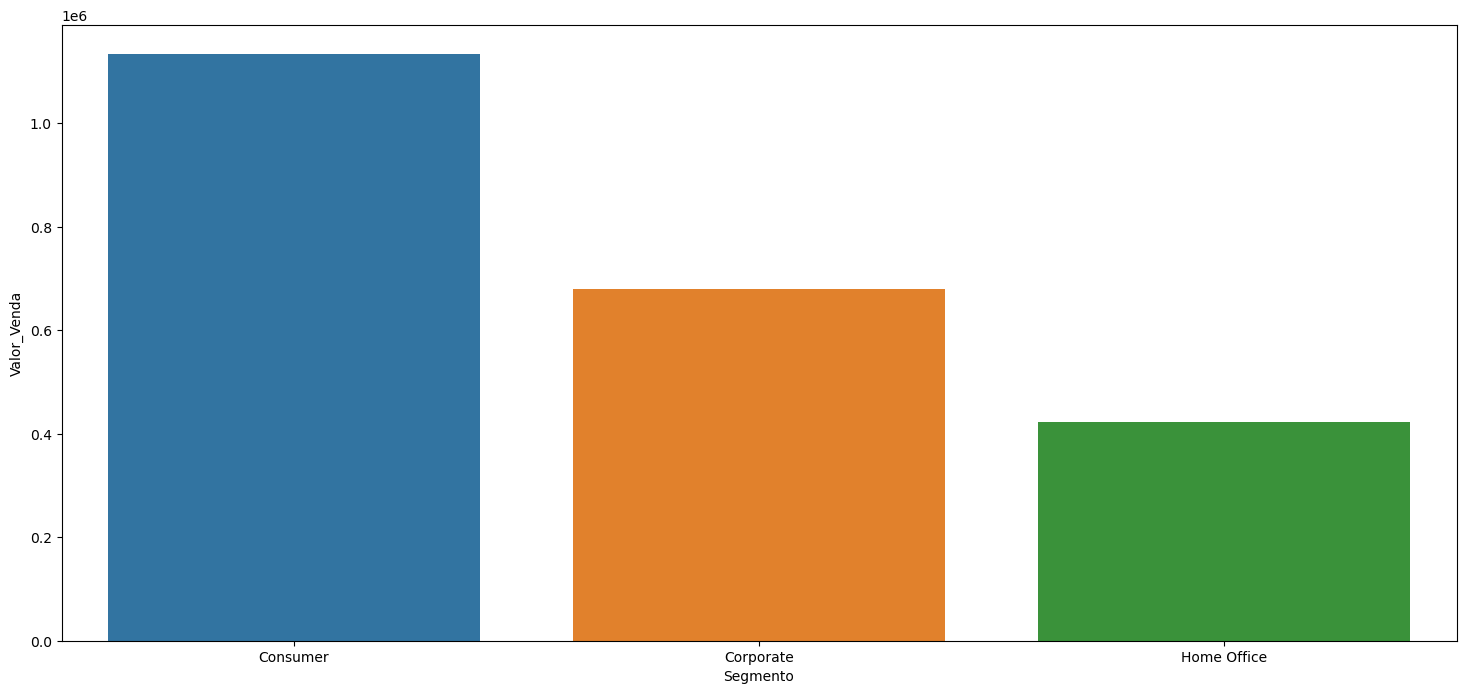

In [53]:
plt.figure(figsize=(18, 8))
sns.barplot(x="Segmento", y="Valor_Venda", data=agr_categoria_vendas);

In [57]:
agr_estado_vendas = df_vendas_varejo.groupby("Estado").agg({"Valor_Venda": "sum"}).reset_index()
agr_estado_vendas.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


In [58]:
cinco_estado_vendas = agr_estado_vendas.iloc[:5]
cinco_estado_vendas

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


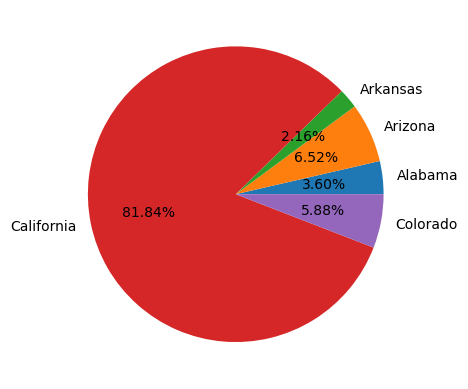

In [60]:
fig1, ax1 = plt.subplots()

ax1.pie(cinco_estado_vendas["Valor_Venda"], labels=cinco_estado_vendas["Estado"], autopct="%1.2f%%")
plt.show()